<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/Projects/blob/main/Credit_card_default_customer_Data_insights_and_Business_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train (2).csv")
data.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,2,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,3,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,4,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,5,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24001 entries, 0 to 24000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  24001 non-null  int64  
 1   limit_bal    24001 non-null  int64  
 2   sex          24001 non-null  float64
 3   education    24001 non-null  float64
 4   marriage     24001 non-null  float64
 5   age          24001 non-null  float64
 6   pay_1        24001 non-null  float64
 7   pay_2        24001 non-null  float64
 8   pay_3        24001 non-null  float64
 9   pay_4        24001 non-null  float64
 10  pay_5        23819 non-null  float64
 11  pay_6        22790 non-null  float64
 12  bill_amt1    24001 non-null  int64  
 13  bill_amt2    24001 non-null  int64  
 14  bill_amt3    24001 non-null  int64  
 15  bill_amt4    24001 non-null  int64  
 16  bill_amt5    23819 non-null  float64
 17  bill_amt6    22790 non-null  float64
 18  pay_amt1     24001 non-null  int64  
 19  pay_

DATA CLEANING

In [ ]:
data['default_oct'].value_counts()

no     18692
yes     5309
Name: default_oct, dtype: int64

In [ ]:
data = data.drop(columns = ['customer_id'])

In [ ]:
data.describe()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,...,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,8351.302029,1.604058,1.856839,1.551644,35.498438,-0.015874,-0.132119,-0.166201,-0.215824,-0.263403,...,2359.795592,2175.804383,2024.383559,1960.335981,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069
std,6475.592450,0.489062,0.792152,0.522663,9.222021,1.123554,1.199237,1.196802,1.173350,1.135120,...,3499.639871,3244.170936,3063.487512,3015.469078,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314
min,500.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3075.000000,-8500.000000,-4066.000000,-10452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,130.000000,116.000000,90.000000,62.000000,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000
50%,7000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1007.000000,953.000000,906.000000,855.500000,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000
75%,12000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3015.000000,2752.000000,2510.500000,2466.000000,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000
max,50000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,83204.000000,44579.000000,46358.000000,48083.000000,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000


In [ ]:
data.isnull().sum()

limit_bal         0
sex               0
education         0
marriage          0
age               0
pay_1             0
pay_2             0
pay_3             0
pay_4             0
pay_5           182
pay_6          1211
bill_amt1         0
bill_amt2         0
bill_amt3         0
bill_amt4         0
bill_amt5       182
bill_amt6      1211
pay_amt1          0
pay_amt2          0
pay_amt3          0
pay_amt4          0
pay_amt5        182
pay_amt6       1211
default_oct       0
dtype: int64

In [ ]:

missing_proportion = data.isnull().sum() / len(data)

columns_to_process = ['pay_5', 'pay_6', 'bill_amt5', 'bill_amt6', 'pay_amt5', 'pay_amt6']

columns_to_remove = []
columns_to_impute = []

for col in columns_to_process:
    if missing_proportion[col] > 0.1: # if missing values in a columns are more than 10% of total values
        columns_to_remove.append(col)
    else:
        columns_to_impute.append(col)

if columns_to_remove:
    data.drop(columns_to_remove, axis=1, inplace=True)
    print("Columns removed:", columns_to_remove)

# Impute missing values in remaining columns
for col in columns_to_impute:
    # Here you can choose different imputation methods like mean, median, mode, or others
    # For simplicity, let's use median imputation


#The median is less sensitive to outliers and extreme values compared to the mean

#The median is a better measure of central tendency for skewed distributions because it doesn't assume the data is symmetric, unlike the mean
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)
    print("Missing values in", col, "imputed with median value:", median_value)

# Now you have a DataFrame 'df' with missing values handled


Missing values in pay_5 imputed with median value: 0.0
Missing values in pay_6 imputed with median value: 0.0
Missing values in bill_amt5 imputed with median value: 906.0
Missing values in bill_amt6 imputed with median value: 855.5
Missing values in pay_amt5 imputed with median value: 75.0
Missing values in pay_amt6 imputed with median value: 75.0


In [ ]:
data.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1500,2.0,1.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,...,1463,938.0,698.0,75,150,86,0,50.0,50.0,yes
1,8500,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,8364,8275.0,8425.0,300,400,315,300,325.0,305.0,no
2,1000,1.0,1.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,...,933,772.0,794.0,150,150,150,24,105.0,110.0,no
3,10500,1.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,0.0,...,7190,7229.0,7340.0,255,260,258,260,265.0,307.0,no
4,10500,2.0,2.0,1.0,44.0,0.0,0.0,0.0,0.0,0.0,...,3558,3592.0,3496.0,180,155,145,130,135.0,200.0,no


In [ ]:
data.isnull().sum()

limit_bal      0
sex            0
education      0
marriage       0
age            0
pay_1          0
pay_2          0
pay_3          0
pay_4          0
pay_5          0
pay_6          0
bill_amt1      0
bill_amt2      0
bill_amt3      0
bill_amt4      0
bill_amt5      0
bill_amt6      0
pay_amt1       0
pay_amt2       0
pay_amt3       0
pay_amt4       0
pay_amt5       0
pay_amt6       0
default_oct    0
dtype: int64

In [ ]:
data = data.drop_duplicates()

DATA PREPROCESSING

sex: Gender (1 = male; 2 = female).

education: Education (1 = graduate school; 2 = university; 3 = high school; 4 =
others).

marriage: Marital status (1 = married; 2 = single; 3 = others).

age: Age (year).

In [ ]:
print(data['sex'].unique())
print(data['marriage'].unique()) #checking categories
print(data['education'].unique())

[2. 1.]
[2. 1. 3. 0.]
[1. 2. 3. 5. 0. 6. 4.]


In [ ]:
# replace 4,5,6 values with 4 in education column
for index in data.loc[data['education'] > 4].index:
  data.loc[index,['education']] = 4.

In [ ]:
# replace 0 value with 3 in marriage column
for index in data.loc[data['marriage'] == 0].index:
  data.loc[index,['marriage']] = 3

In [ ]:
#convert each categorical column to object type
data['marriage'] = data['marriage'].astype('object')
data['sex'] = data['sex'].astype('object')
data['education'] = data['education'].astype('object')


In [ ]:
data['default_oct'] = data['default_oct'].replace({'yes': 1, 'no' : 0}).astype(int)

In [ ]:
data['marriage'] = data['marriage'].replace({1 : 'married', 2 : 'single', 3 : 'others'})
data['sex'] = data['sex'].replace({1 : 'male', 2 : 'female',3 : 'others'})
data['education'] = data['education'].replace({0: 'others', 1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 :'others'})

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#statistical hypothesis

CATEGORICAL FEATURE ANALYSIS

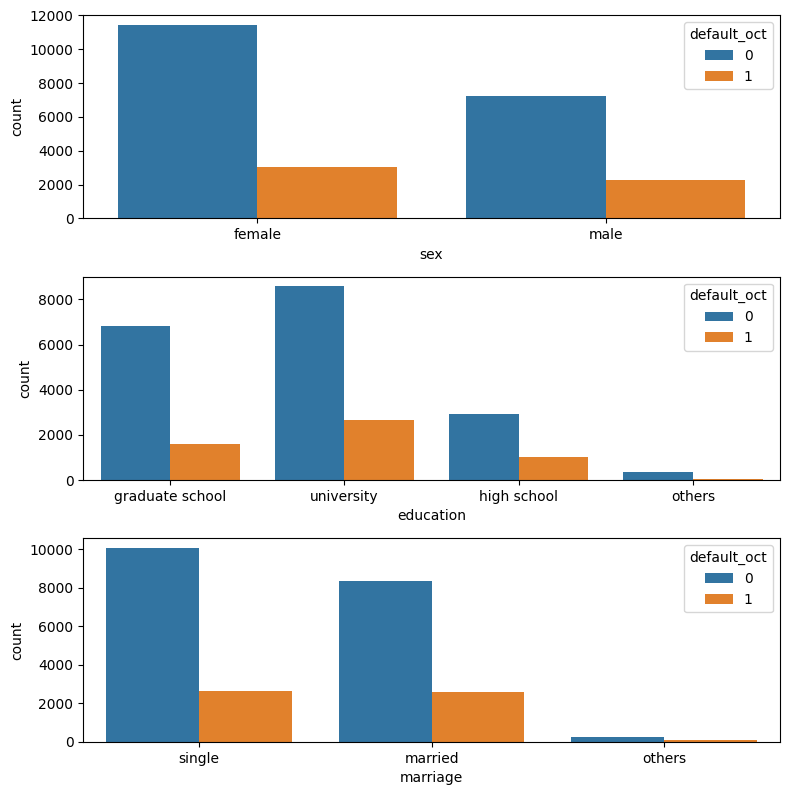

In [ ]:
#count plot
fig,axes=plt.subplots(3,figsize=(8,8))
cols=['sex', 'education', 'marriage']

for i,col in enumerate(cols):

    sns.countplot(x=col, hue="default_oct",data=data,ax=axes[i]);

plt.tight_layout()
plt.savefig("1.png")

ANALYSIS - SEX VARIABLE

Statistical hypothesis on sex

Individual groups or characteristics like race, ethnicity, gender, religion, and age should not lead the model to make unfair predictions.

Ethically, sex should not impact the model to predit default customers

So, it is important to do statistical hypothesis on variable 'sex'

To check if this variable data distribution will influence the chances of customer being a default customer, it is important to perform tests..


If it is a numerical variable, z-test or t-test can be used.

If it is a categorical variable, chisquare test can be used.

Chisquare contingency test is a non parametric test that can be used for categorical variables

So, lets check if the distribution of these variables is normal/gaussian.

In [ ]:
count_oct=data.groupby('sex')[['default_oct']].agg(['count','sum'])
count_oct

default_oct      
             count   sum
sex                     
female       14479  3027
male          9497  2279

In [ ]:
default_count=count_oct['default_oct']['sum'].values
print(default_count)
non_default_count=(count_oct['default_oct']['count']-count_oct['default_oct']['sum']).values
print(non_default_count)

[3027 2279]
[11452  7218]


In [ ]:

contingency_table=pd.DataFrame({"Non-defaulter":non_default_count,
                                        "Defaulter":default_count},
                                        index=["Male","Female"])

stat, p, dof, expected = chi2_contingency(contingency_table)

expected_table=pd.DataFrame(expected,columns=["Non-defaulter","Defaulter"],
                            index=["Male","Female"])

print('sex','\n\nObserved Table\n',contingency_table,'\n\nExpected Table\n',expected_table)

# test-statistic

critical = chi2.ppf(0.95, dof)
if abs(stat) >= critical:
        print('\n')
        print('stat=',stat)
        print("A person's gender has impact on a customer defaulting")
else:
        print("A person's gender has no impact on a customer defaulting ")

print('\nSignificance=%.3f, p=%.3f' % (0.05,p))
if p <= 0.05:
        print("A person's gender has impact on a customer defaulting")
else:
        print("A person's gender has no impact on a customer defaulting ")

sex 

Observed Table
         Non-defaulter  Defaulter
Male            11452       3027
Female           7218       2279 

Expected Table
         Non-defaulter    Defaulter
Male     11274.730147  3204.269853
Female    7395.269853  2101.730147


stat= 31.616225650307857
A person's gender has impact on a customer defaulting

Significance=0.050, p=0.000
A person's gender has impact on a customer defaulting


It can be concluded that the variable 'sex' can influence model's predictions. So, it cannot be ignored because of ethical consideration.

Text(0.5, 1.0, 'Distribution of Age by Sex/Gender')

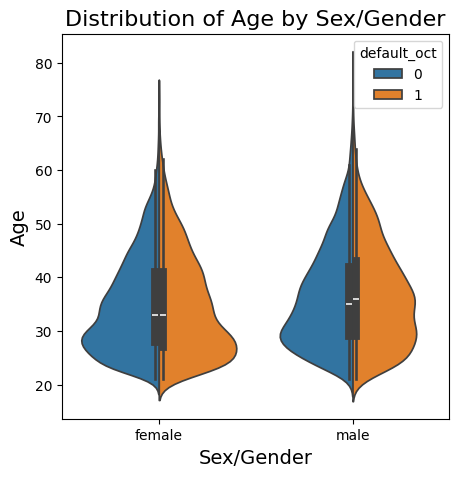

In [ ]:
#Violinp plot
plt.figure(figsize=(5,5))
sns.violinplot(x="sex", y="age",hue = 'default_oct',split=True,data=data)

# Adding labels and title
plt.xlabel("Sex/Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.title("Distribution of Age by Sex/Gender", fontsize=16)


NOTE: To calculate probability we can multiply probability of males defaulting by probability of customer being male....

But looking at the distributions we can assume that the probability is fair(0.5) for a customer being male or female.

So, to determine probability of males/ females defaulting..using ratio of male/female defaulters by total number of males/females could be appropriate.



In [ ]:
# ratio of male defaulters by total number of males
len(data[data['default_oct'] ==1].loc[data['sex'] == 'male'])/len(data.loc[data['sex'] == 'male'])

0.23997051700537012

In [ ]:
# ratio of female defaulters by total number of females
len(data[data['default_oct'] ==1].loc[data['sex'] == 'female'])/len(data.loc[data['sex'] == 'female'])

0.20906139926790523

Count of female defaulters are more than male defaulters.

But based on above calculated probabilities, males have comparatively higher chance of defaulting

ANALYSIS - EDUCATION

Text(0.5, 1.0, 'count of education levels')

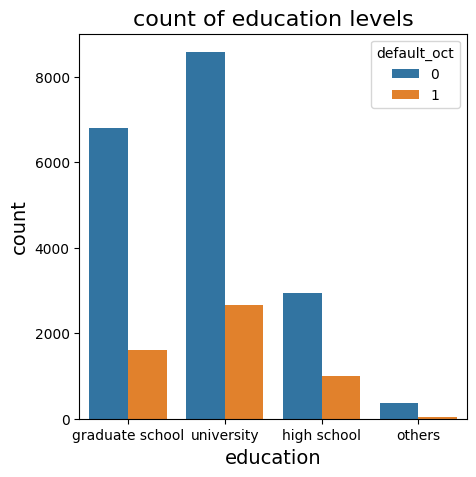

In [ ]:
#count plot of education categories
plt.figure(figsize=(5,5))
sns.countplot(x="education",hue = 'default_oct',data=data)

# Adding labels and title
plt.xlabel("education", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.title("count of education levels", fontsize=16)


In [ ]:
#defaulters education categories count
data[data['default_oct'] == 1 ].groupby('education')['default_oct'].count()

education
graduate school    1612
high school        1000
others               29
university         2665
Name: default_oct, dtype: int64

In [ ]:
1000/len(data[data['education'] == 'high school']) # probability of high school students defaulting

0.2537427048972342

In [ ]:
2665/len(data[data['education'] == 'university'])  # probability of university students defaulting

0.2371207402793843

In [ ]:
1612/len(data[data['education'] == 'graduate school']) # probability of graduate students defaulting

0.19169936972291593

As education level increases, probability of defaulting decreases

ANALYSIS - MARITAL STATUS

Text(0.5, 1.0, 'distribution of age by marital statuses ')

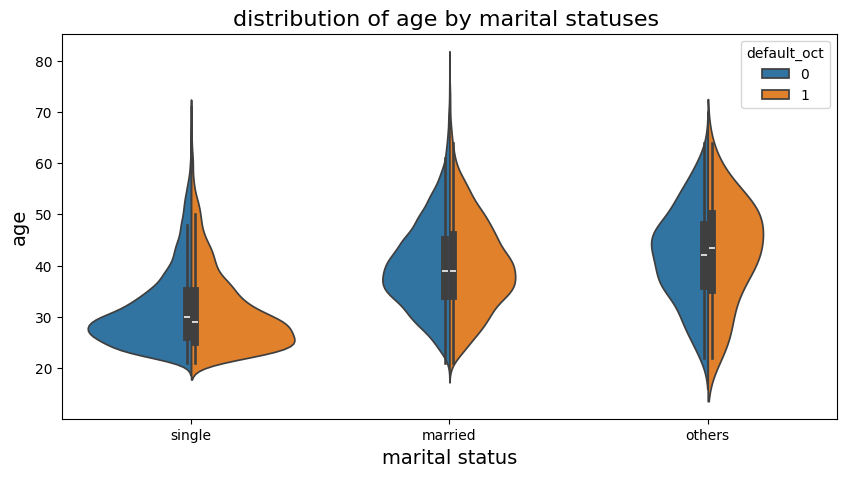

In [ ]:
#violin plot wrt marital status
plt.figure(figsize=(10,5))
sns.violinplot(x="marriage",y= 'age',hue = 'default_oct',split = True,data=data)

# Adding labels and title
plt.xlabel("marital status", fontsize=14)
plt.ylabel("age", fontsize=14)
plt.title("distribution of age by marital statuses ", fontsize=16)


In [ ]:
# ratio of single defaulters by total number of single people
len(data[data['default_oct'] ==1].loc[data['marriage'] == 'single'])/len(data.loc[data['marriage'] == 'single'])

0.2090009425070688

In [ ]:
# ratio of married defaulters by total number of married people
len(data[data['default_oct'] ==1].loc[data['marriage'] == 'married'])/len(data.loc[data['marriage'] == 'married'])

0.23513810133528443

In [ ]:
# ratio of other category defaulters by total number of other category people
len(data[data['default_oct'] ==1].loc[data['marriage'] == 'others'])/len(data.loc[data['marriage'] == 'others'])

0.23870967741935484

As shown above, singles and married people are likely to become default customers and singles have less probability of defaulting compared to married people.

Mainly singles aged between 20 to 30 years are more likely to default.

In [ ]:
#defaulters grouped by marriage and qualification
data[data['default_oct'] == 1].groupby(['marriage','education'])['default_oct'].count()


marriage  education      
married   graduate school     613
          high school         619
          others               14
          university         1325
others    graduate school      10
          high school          26
          university           38
single    graduate school     989
          high school         355
          others               15
          university         1302
Name: default_oct, dtype: int64

Both married and single univeristy graduates have high chances of defaulting payments

NUMERICAL VARIABLE ANALYSIS

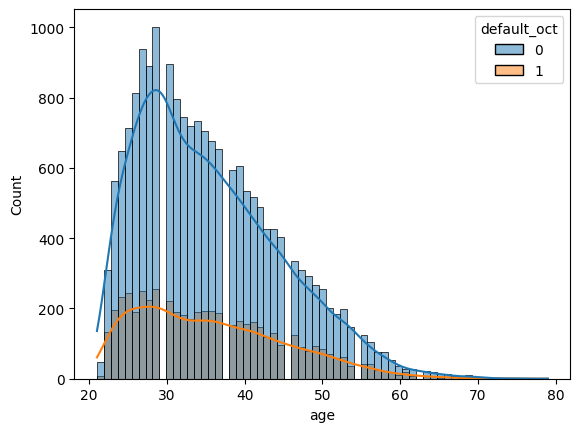

In [ ]:
#histogram of age distribution
sns.histplot(x='age',hue='default_oct',data=data,kde=True);

most of the customers fall under middle age category.( 25-35 years)

In [ ]:
#Grouping age variable with ranges (age bins)
data['AgeBin'] = pd.cut(data['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    5682
(40, 50]    4849
(30, 35]    4621
(35, 40]    3918
(20, 25]    3101
(50, 60]    1583
(60, 80]     222
Name: AgeBin, dtype: int64


In [ ]:
#Grouping age bins with marital status categories
data[data['default_oct']==1].groupby(['AgeBin','marriage'])['default_oct'].count()

AgeBin    marriage
(20, 25]  married     105
          others        5
          single      708
(25, 30]  married     291
          others        7
          single      844
(30, 35]  married     446
          others        7
          single      468
(35, 40]  married     555
          others        9
          single      288
(40, 50]  married     825
          others       28
          single      274
(50, 60]  married     299
          others       17
          single       68
(60, 80]  married      50
          others        1
          single       11
Name: default_oct, dtype: int64

Plotting age bins with marital status categories

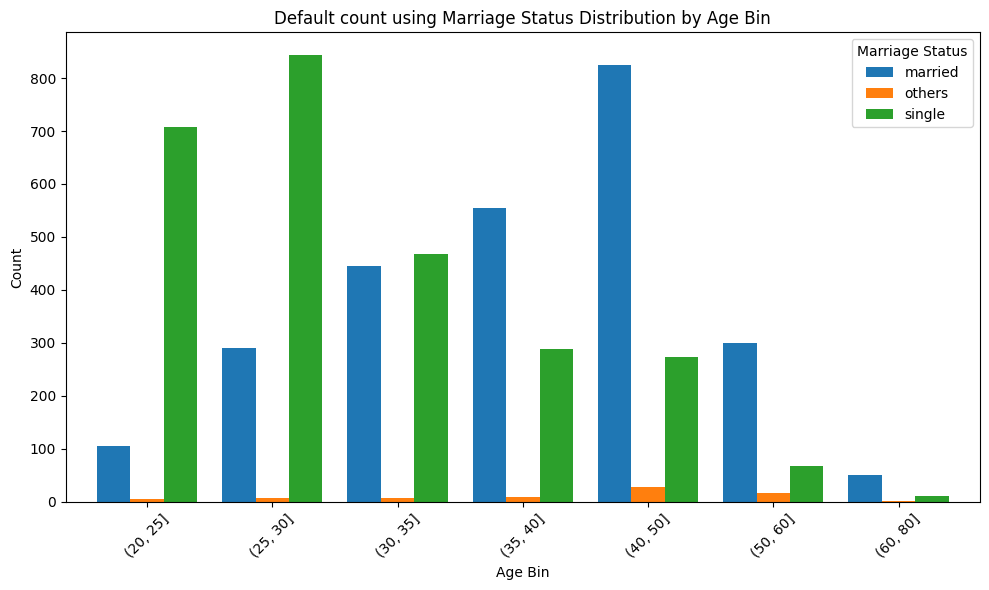

In [ ]:
d = {
    'AgeBin': ['(20, 25]', '(20, 25]', '(20, 25]', '(25, 30]', '(25, 30]', '(25, 30]', '(30, 35]', '(30, 35]', '(30, 35]',
               '(35, 40]', '(35, 40]', '(35, 40]', '(40, 50]', '(40, 50]', '(40, 50]', '(50, 60]', '(50, 60]', '(50, 60]',
               '(60, 80]', '(60, 80]', '(60, 80]'],
    'Marriage': ['married', 'others', 'single', 'married', 'others', 'single', 'married', 'others', 'single',
                 'married', 'others', 'single', 'married', 'others', 'single', 'married', 'others', 'single',
                 'married', 'others', 'single'],
    'Count': [105, 5, 708, 291, 7, 844, 446, 7, 468, 555, 9, 288, 825, 28, 274, 299, 17, 68, 50, 1, 11]
}

# Creating DataFrame
df = pd.DataFrame(d)

# Pivot the DataFrame to get 'AgeBin' on x-axis, 'Marriage' categories as legend, and 'Count' as bar heights
pivot_df = df.pivot(index='AgeBin', columns='Marriage', values='Count')

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Default count using Marriage Status Distribution by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marriage Status')
plt.tight_layout()

# Display the plot
plt.show()


As you can see single people having age 20 to 30 years and married people having 40 to 50 years of age have high chance of defaulting

Count of the number of customers who default the payment is inversely proportional to the increase in age factor.

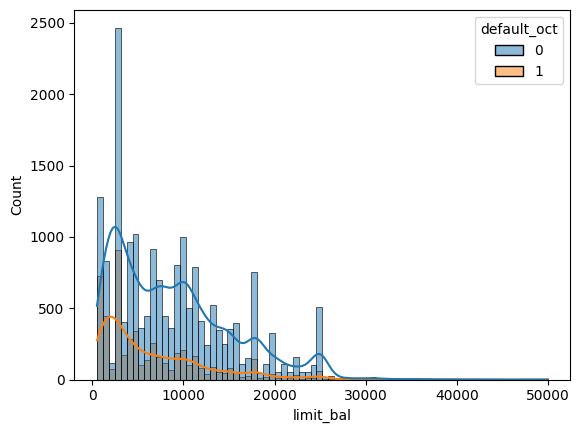

In [ ]:
#histogram plot of limit balance
sns.histplot(x='limit_bal',hue='default_oct',data=data,kde=True);

Most of the customers possess limit balance less than

Limit_Bal and Age are highly skewed.

In [ ]:
ncol = data.select_dtypes('integer') #numerical columns

In [ ]:
ccol = data.select_dtypes('object') #categorical columns

In [ ]:
# Grouping limit balance to bins using ranges.
data['limitbin'] = pd.cut(data['limit_bal'],[0,10000, 20000, 30000, 40000, 50000])
print(data['limitbin'].value_counts())

(0, 10000]        16295
(10000, 20000]     6272
(20000, 30000]     1346
(30000, 40000]       62
(40000, 50000]        1
Name: limitbin, dtype: int64


In [ ]:
d1 = data.groupby(['limitbin','default_oct'])['sex'].count().reset_index().rename(columns = {'sex' : 'count'})

<Axes: xlabel='limitbin', ylabel='count'>

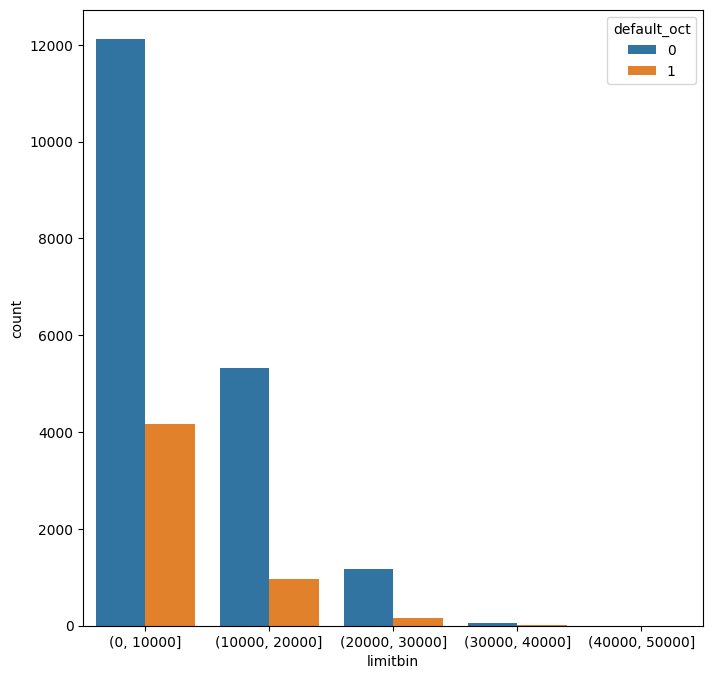

In [ ]:
#bar plot of limit balance with default count as hue
plt.figure(figsize = (8,8))
sns.barplot(x = 'limitbin',y = 'count',hue = 'default_oct',data = d1)

Most of the defaulting customers have limit balance less than 10000

ANALYSIS OF PAYMENT AND BILL AMOUNT VARIABLES

In [ ]:
data['pay_1'] = data['pay_1'].astype(int)
data['pay_2'] = data['pay_2'].astype(int)
data['pay_3'] = data['pay_3'].astype(int)# These values are of float type. So these are converted to integer types.
data['pay_4'] = data['pay_4'].astype(int)
data['pay_5'] = data['pay_5'].astype(int)
data['pay_6'] = data['pay_6'].astype(int)
data['pay_amt5'] = data['pay_amt5'].astype(int)
data['pay_amt6'] = data['pay_amt6'].astype(int)
data['bill_amt5'] = data['bill_amt5'].astype(int)
data['bill_amt6'] = data['bill_amt6'].astype(int)


In [ ]:
 #considering the numerical columns again as few columns are converted to integer type above
ncol = data.select_dtypes('integer')

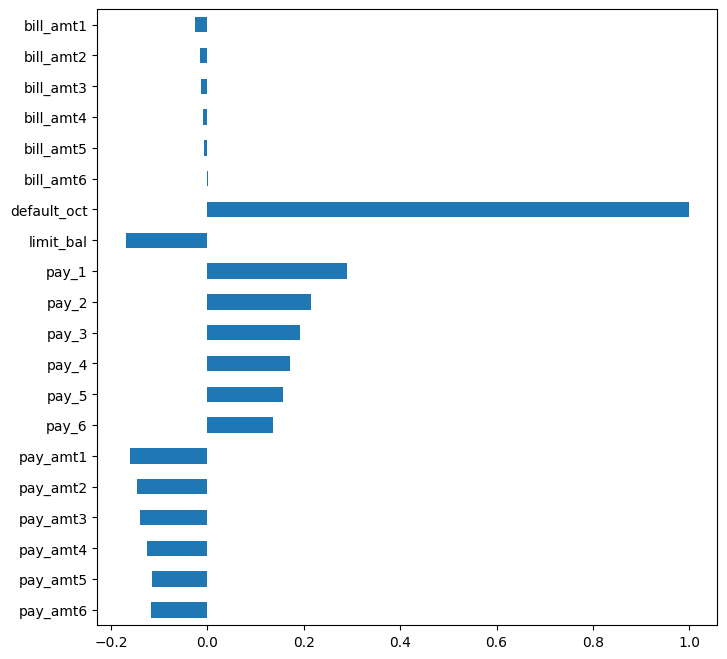

In [ ]:
#Numerical columns correlation with target variable

plt.figure(figsize=(8,8))
g=ncol.corrwith(data['default_oct'],method='spearman').sort_index(ascending=False)
g.plot(kind='barh');
plt.savefig("3.png")

If pay amount is increased, it means due amount is being paid which is a good sign and hence chances of default decreases.

Similarily if pay increases, it means the number of months of payment delay for previous months debt is increasing which in turn increases the chances of default.

Only recent months Bill amount is having little influence the target variable and also only last three months(SEP, AUG, JUL) payments and due statuses are influencing the output variable

From above correlations, bill_amt,pay and pay_amt features for last 3 months are least correlated with target variable.

We can consider removing these variables if their data distributions over the time frame (months) are same.

To check if their respective distributions are same, we can use normality test

USE NORMALITY TEST TO CHECK IF VARIABLES FOLLOW NORMAL DISTRIBUTION.

In [ ]:
from scipy.stats import normaltest

In [ ]:
ncolumns=["pay_1","limit_bal","bill_amt1", "pay_amt1","age"]

for nc in ncolumns:
    stat, p = normaltest(data[nc])
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian for',nc,'column: (fail to reject H0)')
    else:
        print('Sample does not look Gaussian for',nc,'column: (reject H0)')

Sample does not look Gaussian for pay_1 column: (reject H0)
Sample does not look Gaussian for limit_bal column: (reject H0)
Sample does not look Gaussian for bill_amt1 column: (reject H0)
Sample does not look Gaussian for pay_amt1 column: (reject H0)
Sample does not look Gaussian for age column: (reject H0)


AS SHOWN ABOVE ALL NUMERICAL VARIABLE DISTRIBUTIONS ARE NON GAUSSIAN. SO NON PARAMETRIC VARIABLE SUCH AS FRIEDMAN CHI SQUARE TESTS SHOULD BE USED TO CHECK IF VARIABLES CONTAIN SAME DISTRIBUTION.




In [ ]:
from scipy.stats import friedmanchisquare
# this test is used to check if variables contain same distribution


In [ ]:
stat, p = friedmanchisquare(data["pay_1"], data["pay_2"], data["pay_3"], data["pay_4"], data["pay_5"], data["pay_6"])

print('Stat:',stat,'p-value:',p)
if p > 0.05:
    print('distributions are same\n\n')
else:
    print('distributions are different\n\n')


Stat: 1502.0653470782693 p-value: 0.0
distributions are different




In [ ]:
stat, p = friedmanchisquare(data["pay_amt1"], data["pay_amt2"], data["pay_amt3"],data["pay_amt4"], data["pay_amt5"], data["pay_amt6"])

print('Stat:',stat,'p-value:',p)
if p > 0.05:
    print('distributions are same\n\n')
else:
    print('distributions are different\n\n')


Stat: 7345.173564487524 p-value: 0.0
distributions are different




In [ ]:
stat, p = friedmanchisquare(data["bill_amt1"], data["bill_amt2"], data["bill_amt3"], data["bill_amt4"], data["bill_amt5"], data["bill_amt6"])

print('Stat:',stat,'p-value:',p)
if p > 0.05:
    print('distributions are same\n\n')
else:
    print('distributions are different\n\n')


Stat: 1506.3550084085332 p-value: 0.0
distributions are different




 As the distributions of these variables over different months are not same, we consider using 6 months transaction data.

In [ ]:
# For pay variables -2,-1 AND 0 COME UNDER SAME CATEGORY(due cleared soon)
for i in range(1,7):
 for index in data.loc[data[str('pay_') + str(i)] < 0].index:
  data.loc[index,[str('pay_') + str(i)]] = 0


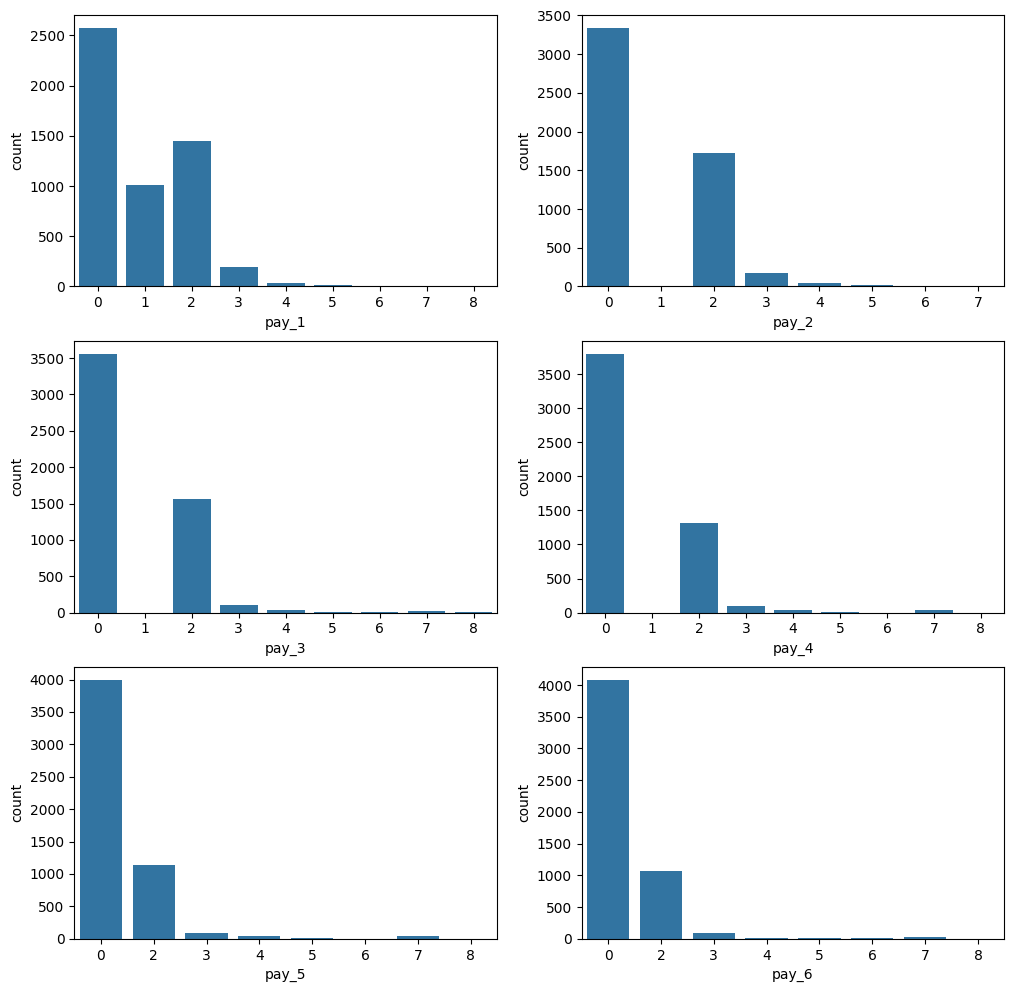

In [ ]:
# Count plot of defaulters pay status for 6 months
i = 1
plt.figure(figsize=(12, 12))
for c in range(1,7):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[data['default_oct'] ==1][str('pay_') + str(c)],data = data)
    i+=1

The majority of customers are responsibly settling their credit card bills, indicating a significantly reduced likelihood of default compared to others.

Given the limited number of customers experiencing delays of four months or more in all PAY_X features, consolidating them for a new analysis would provide a more meaningful average default rate for this subgroup.

In [ ]:
data['pay_amt1'].sort_values()

7063         0
3486         0
17654        0
3484         0
11752        0
         ...  
21667    20250
14115    21195
15361    24667
15026    25250
18874    43677
Name: pay_amt1, Length: 23976, dtype: int64

Most of the payments fall below 1000. So lets consider payment ranges:

0-250

250-500

500-750

750-1000

In [ ]:
data['paymentbin1'] = pd.cut(data['pay_amt1'],[0, 250,500, 1000])
#print(data['paymentbin1'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin1'])['default_oct'].count()

data['paymentbin2'] = pd.cut(data['pay_amt2'],[0, 250,500, 1000])
#print(data['paymentbin2'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin2'])['default_oct'].count()

data['paymentbin3'] = pd.cut(data['pay_amt3'],[0, 250,500, 1000])
#print(data['paymentbin1'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin3'])['default_oct'].count()

data['paymentbin4'] = pd.cut(data['pay_amt4'],[0, 250,500, 1000])
#print(data['paymentbin1'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin4'])['default_oct'].count()

data['paymentbin5'] = pd.cut(data['pay_amt5'],[0, 250,500, 1000])
#print(data['paymentbin5'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin5'])['default_oct'].count()

data['paymentbin6'] = pd.cut(data['pay_amt6'],[0, 250,500, 1000])
#print(data['paymentbin5'].value_counts())
data[data['default_oct']==1].groupby(['paymentbin6'])['default_oct'].count()


paymentbin6
(0, 250]       3092
(250, 500]      373
(500, 1000]     129
Name: default_oct, dtype: int64

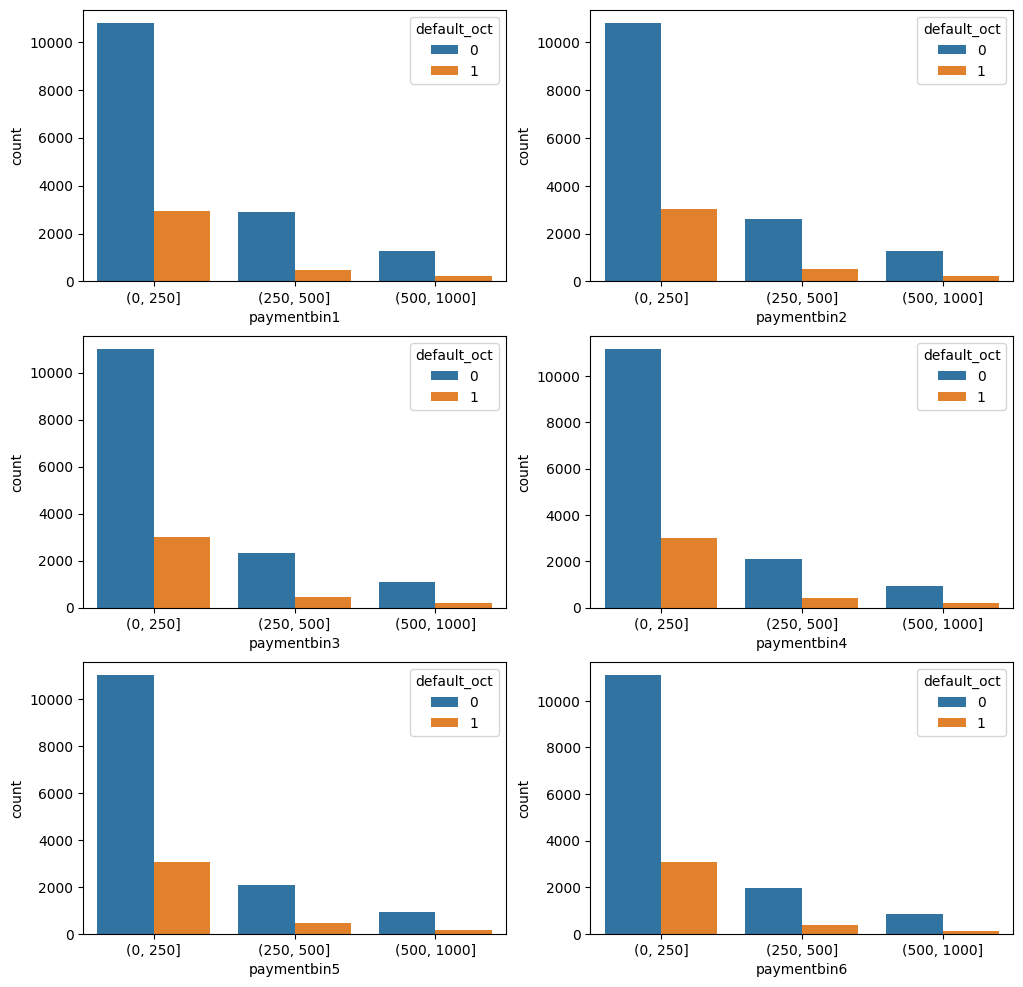

In [ ]:
# Count plot of defaulters payment ranges for 6 months
i = 1
plt.figure(figsize=(12, 12))
for c in range(1,7):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[str('paymentbin') + str(i)],hue = 'default_oct',data = data)
    i+=1

Across all the months, it is clear that most of the defaulters fall in payment range 0-250.

Recommendation:

Minimum payment range

<ipython-input-60-adaae945c41a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

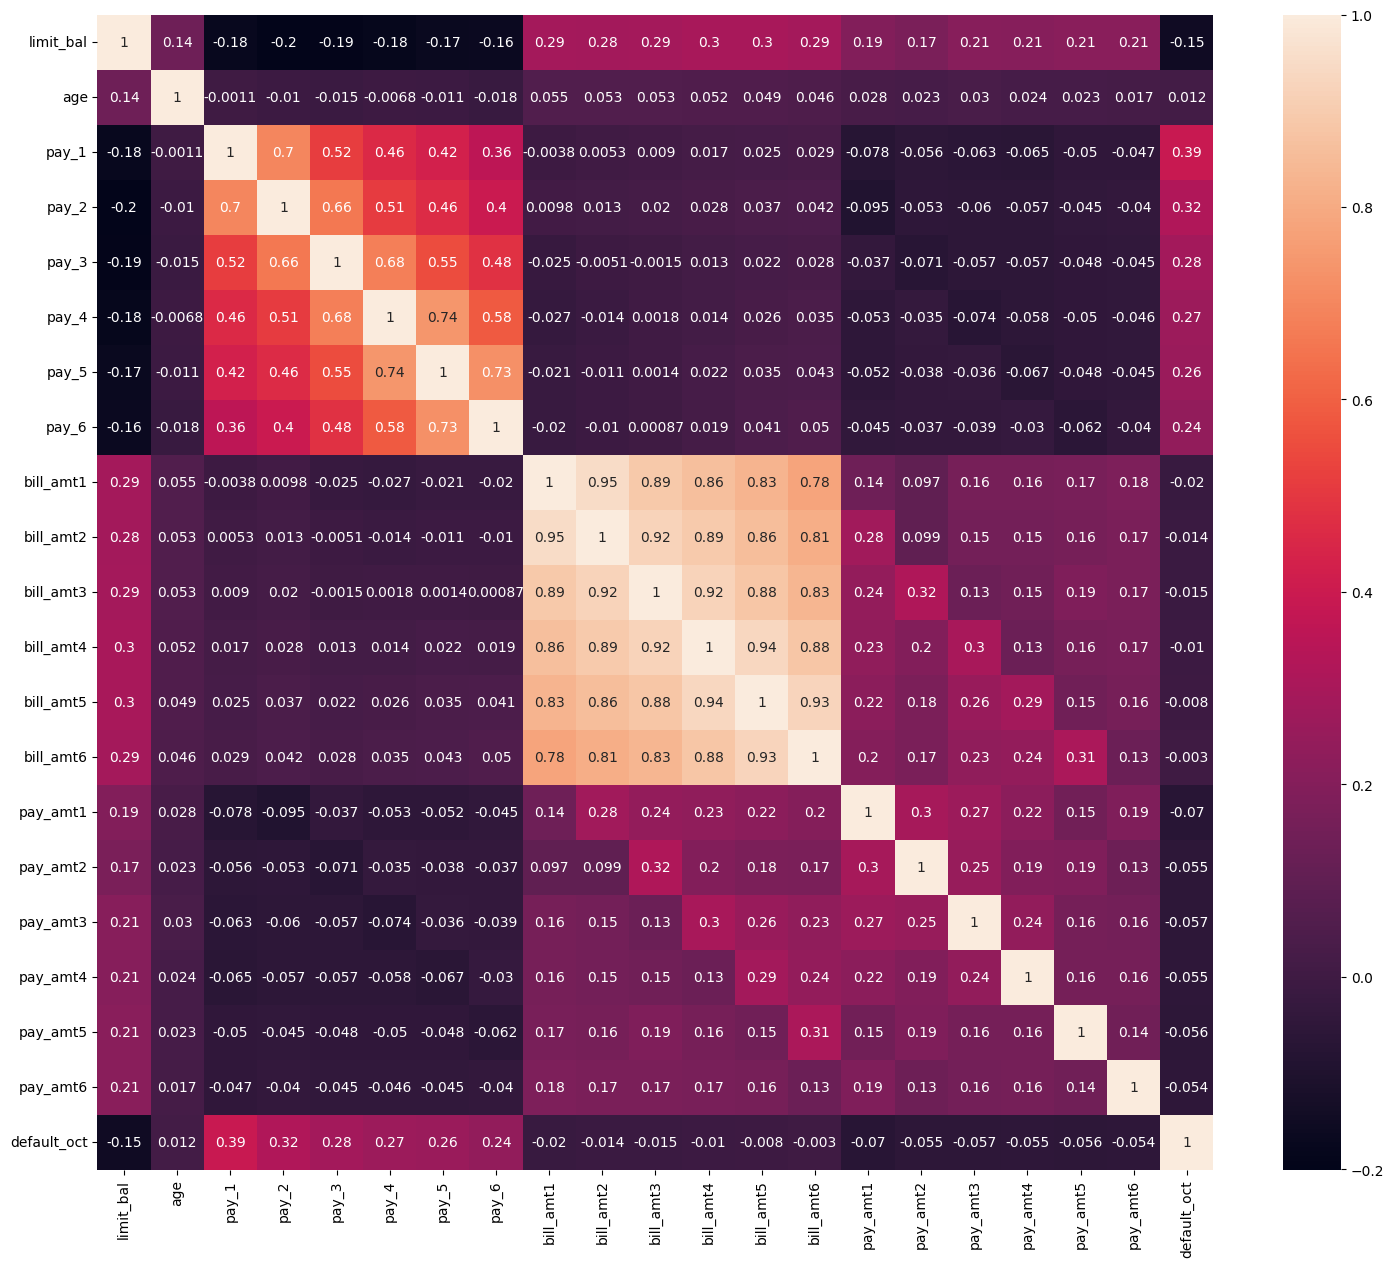

In [ ]:
plt.figure(figsize = (18,15))

sns.heatmap(data.corr(),annot = True)

As shown above, the correlation between bill_amt1 and bill_amt(1 to 6) decreases. It is because in each month the some preceding month due amount is paid(pay_amt) such that the bill amount which results in reduced bill amount.

Operation:
new_month_bill_amount = old_month_bill_amount - old_month payment_amount

Pay_i and bill_amt_i variable maintains high correlation with recent months

The credit limit shows a moderate positive correlation with the bill amounts, implying higher credit limits are associated with higher bill amounts.

Age has a low correlation with repayment status, which means age is not a strong predictor of repayment behavior



**ANALYSIS INSIGHTS:**

1. Count of female defaulters are more than male defaulters.

2. But based on above calculated probabilities, males have comparatively higher chance of defaulting.  

3. As education level increases, probability of defaulting decreases.

4. As shown above, singles and married people are likely to become default customers and singles have less probability of defaulting compared to married people.

5. Mainly singles aged between 20 to 30 years are more likely to default.

6. Both married and single university graduates have high chances of defaulting payments

7. Most of the customers fall under middle age category.( 25-35 years)

8. As you can see single people having age 20 to 30 years and married people having 40 to 50 years of age have high chance of defaulting

9. Count of the number of customers who default the payment is inversely proportional to the increase in age factor.

10. Most of the customers possess limit balance less than

11. Limit_Bal and Age are highly skewed.

12. Most of the defaulting customers have limit balance less than 10000

13. If pay amount is increased, it means due amount is being paid which is a good sign and hence chances of default decreases.

14. Similarly if pay increases, it means the number of months of payment delay for previous months debt is increasing which in turn increases the chances of default.

15. Only recent months Bill amount is having little influence the target variable and also only last three months(SEP, AUG, JUL) payments and due statuses are influencing the output variable.
Pay variable maintains high correlation with recent months

16. The correlation between bill_amt1 and bill_amt(1 to 6) decreases. It is because in each month the some preceding month due amount is paid(pay_amt) such that the bill amount which results in reduced bill amount.

      Operation: new_month_bill_amount = old_month_bill_amount - old_month payment_amount

17. We can also consider of removing last three months details assuming that and using data from recent 3 month payment history details.

18. Though the same variables over different months are highly correlated, as their distributions are not same, we consider using 6 months transaction data

19. The majority of customers are responsibly settling their credit card bills, indicating a significantly reduced likelihood of default compared to others.

20. Given the limited number of customers experiencing delays of four months or more in all PAY_X features, consolidating them for a new analysis would provide a more meaningful average default rate for this subgroup.

21. Most of the payments fall below 1000.

22. Across all the months, it is clear that most of the defaulters fall in payment range 0-250.
